# Financial analysis and rating modul


### Fetch Financial Data for Selected Tickers (2024)

- Using yfinance, download financial statements.
- Extract only data for the year 2024.
- Save the combined DataFrame to a CSV file.


In [222]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [223]:

tickers = ["WMT", "TGT","COST"]
all_data = []

for ticker in tickers:
    stock = yf.Ticker(ticker)

  
    income = stock.financials.T
    balance = stock.balance_sheet.T
    cashflow = stock.cashflow.T


    for date in income.index:
        if date.year == 2024:
            combined = {
                **{f"income_{col}": income.loc[date, col] for col in income.columns},
                **{f"balance_{col}": balance.loc[date, col] for col in balance.columns if date in balance.index},
                **{f"cashflow_{col}": cashflow.loc[date, col] for col in cashflow.columns if date in cashflow.index},
                "Company": ticker,
                "Year": date.year,
            }
            all_data.append(combined)


df = pd.DataFrame(all_data)
cols = ["Company", "Year"] + [c for c in df.columns if c not in ("Company", "Year")]
df = df[cols]


df.to_csv("all_financials_2024.csv", index=False)


# Doing analysis

In [224]:

df = pd.read_csv(r"C:\Users\Namai\Desktop\Financial Analysis\all_financials_2024.csv")
df.head()

,Company,Year,income_Tax Effect Of Unusual Items,income_Tax Rate For Calcs,income_Normalized EBITDA,income_Total Unusual Items,income_Total Unusual Items Excluding Goodwill,income_Net Income From Continuing Operation Net Minority Interest,income_Reconciled Depreciation,income_Reconciled Cost Of Revenue,...,cashflow_Change In Other Current Assets,cashflow_Stock Based Compensation,income_Gain On Sale Of Security,income_Total Other Finance Cost,balance_Preferred Stock,balance_Finished Goods,cashflow_Short Term Debt Issuance,cashflow_Purchase Of Investment,cashflow_Change In Other Working Capital,cashflow_Asset Impairment Charge
0,WMT,2024,0.0,0.255,3.638400e+10,0.0,0.0,1.551100e+10,1.185300e+10,4.901420e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TGT,2024,0.0,0.219,8.600000e+09,NaN,NaN,4.138000e+09,2.801000e+09,7.744200e+10,...,-85000000.0,251000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COST,2024,6344000.0,0.244,1.212000e+10,26000000.0,26000000.0,7.367000e+09,2.237000e+09,2.223580e+11,...,NaN,818000000.0,26000000.0,-65000000.0,0.0,1.864700e+10,928000000.0,-1.470000e+09,741000000.0,-9000000.0


In [225]:
df = df[[
    "Company", 
    "Year",
    "income_Net Income", 
    "balance_Stockholders Equity",
    "income_EBIT", 
    "income_Total Revenue", 
    "income_Gross Profit", 
    "balance_Current Assets", 
    "balance_Current Liabilities", 
    "balance_Inventory", 
    "balance_Total Assets", 
    "balance_Total Liabilities Net Minority Interest"
]]


In [226]:
df['Company'] = df['Company'].replace({
    'COST': 'Costco',
    'TGT': 'Target Corp',
    'WMT': 'Walmart'
})


In [227]:
df.head()

,Company,Year,income_Net Income,balance_Stockholders Equity,income_EBIT,income_Total Revenue,income_Gross Profit,balance_Current Assets,balance_Current Liabilities,balance_Inventory,balance_Total Assets,balance_Total Liabilities Net Minority Interest
0,Walmart,2024,1.551100e+10,8.386100e+10,2.453100e+10,6.481250e+11,1.579830e+11,7.687700e+10,9.241500e+10,5.489200e+10,2.523990e+11,1.618280e+11
1,Target Corp,2024,4.138000e+09,1.343200e+10,5.799000e+09,1.074120e+11,2.958400e+10,1.749800e+10,1.930400e+10,1.188600e+10,5.535600e+10,4.192400e+10
2,Costco,2024,7.367000e+09,2.362200e+10,9.909000e+09,2.544530e+11,3.209500e+10,3.424600e+10,3.546400e+10,1.864700e+10,6.983100e+10,4.620900e+10


## Profitability

### ROI (Return on Investment)

I calculated ROI by dividing net income by stockholders equity. This ratio shows how much profit the company generates from its invested capital.

ROI helps assess how efficiently the company uses its resources and what returns investors can expect.



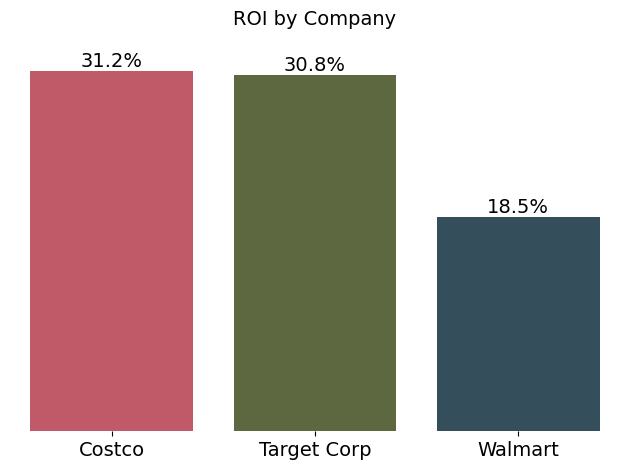

In [228]:

colors = {
    'Costco': '#D1495B',      
    'Target Corp': '#616F39', 
    'Walmart': '#2F5061'      
}

df["ROI"] = df["income_Net Income"] / df["balance_Stockholders Equity"]

order = df.sort_values("ROI", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="ROI",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=14,
    )

ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("ROI by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


ROI measures how effectively a company generates profit from the capital invested. Values above 25 to 30% generally indicate strong performance while numbers below 15% may suggest less efficient use of resources.

Costco – 31.2%, showing strong efficiency

Target – 30.8%, a very solid result

Walmart – 18.5%, moderate performance

### Gross Margin

I calculated gross margin by dividing gross profit by total revenue. This metric shows how much profit the company makes from its core operations before other expenses.

It indicates the company efficiency in managing production costs and its ability to generate profit from sales.



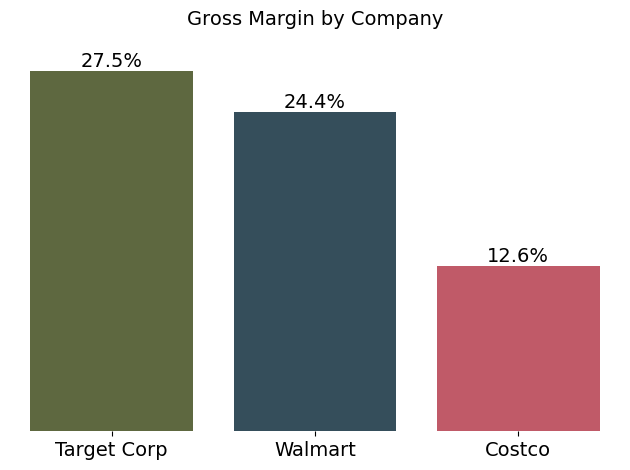

In [229]:

df["Gross_Margin"] = df["income_Gross Profit"] / df["income_Total Revenue"]


order = df.sort_values("Gross_Margin", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="Gross_Margin",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=14,
    )


ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("Gross Margin by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


A higher gross margin means a company keeps more profit from sales after covering the cost of goods sold. Margins above 25% usually indicate healthy pricing power, while those below 15% may point to tighter competition or lower profitability.

Target – 27.5%, reflecting strong pricing power

Walmart – 24.4%, slightly below ideal but still decent

Costco – 12.6%, quite low, indicating tighter margins

### ROS (Return on Sales)
To measure operational efficiency, I calculated ROS by dividing net income by total revenue. This ratio showed me how much profit the company keeps from each dollar of sales after covering all expenses.

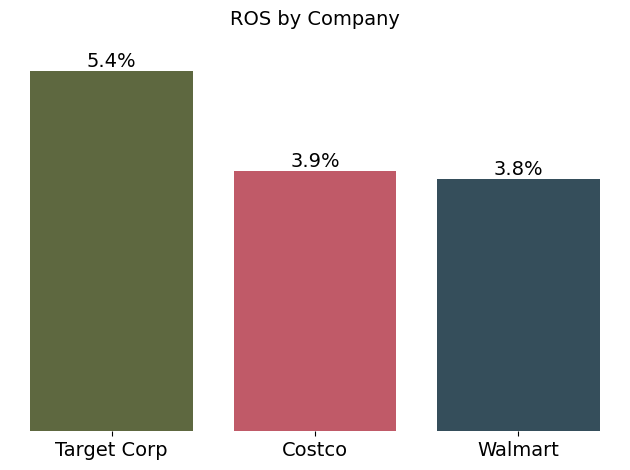

In [230]:
df["ROS"] = df["income_EBIT"] / df["income_Total Revenue"]

order = df.sort_values("ROS", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="ROS",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=14,
    )

ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("ROS by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Higher ROS shows better profitability and operational efficiency. Values above 5% are generally good, while below 3% might suggest weaker margins or higher costs.

Target – 5.4%, solid profitability

Costco – 3.9%, moderate performance

Walmart – 3.0%, on the lower end



## Liquidity

### Current Ratio
To assess short term liquidity, I calculated the current ratio by dividing current assets by current liabilities. This showed me whether the company can meet its short term obligations using its most liquid assets. 

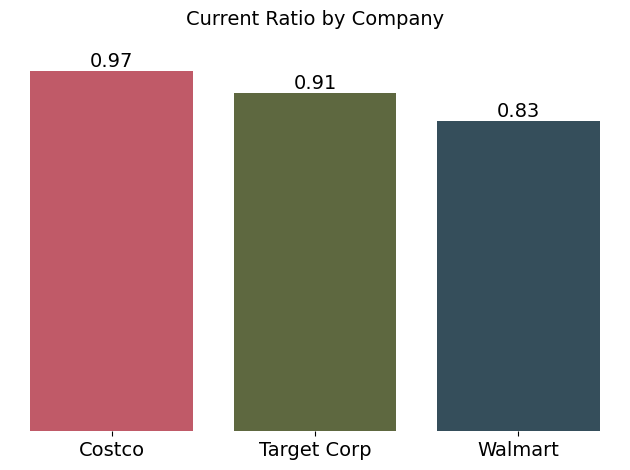

In [231]:
df["Current Ratio"] = df["balance_Current Assets"] / df["balance_Current Liabilities"]

order = df.sort_values("Current Ratio", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="Current Ratio",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=14,
    )

ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("Current Ratio by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Current ratio near 1 or slightly below is typical and generally healthy in retail, reflecting efficient cash and inventory management. Values well below 1 could indicate liquidity concerns.

Costco – 0.97, close to ideal liquidity

Target – 0.91, slightly lower but still acceptable

Walmart – 0.83, somewhat tight liquidity

## Quick ratio
Quick ratio is a stricter liquidity test that excludes inventory from current assets. It shows whether a company can meet short-term liabilities without relying on inventory sales.

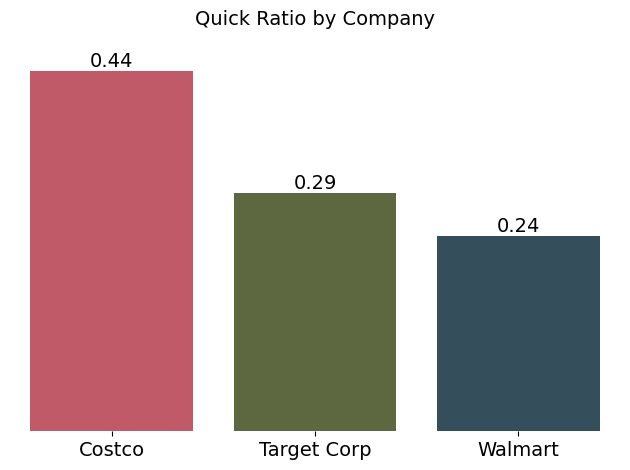

In [232]:
df["Quick Ratio"] = (df["balance_Current Assets"] - df["balance_Inventory"]) / df["balance_Current Liabilities"]

order = df.sort_values("Quick Ratio", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="Quick Ratio",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=14,
    )

ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("Quick Ratio by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Quick ratio below 1 is common in retail due to high inventory levels, but higher values indicate better short-term liquidity excluding inventory.

Costco – 0.44, better liquidity position

Target – 0.29, moderate liquidity

Walmart – 0.24, relatively low liquidity

## Activity

### Asset Turnover
To understand how efficiently the company uses its assets, I calculated asset turnover by dividing total revenue by total assets. This gave me a view into how well the company converts its asset base into sales.

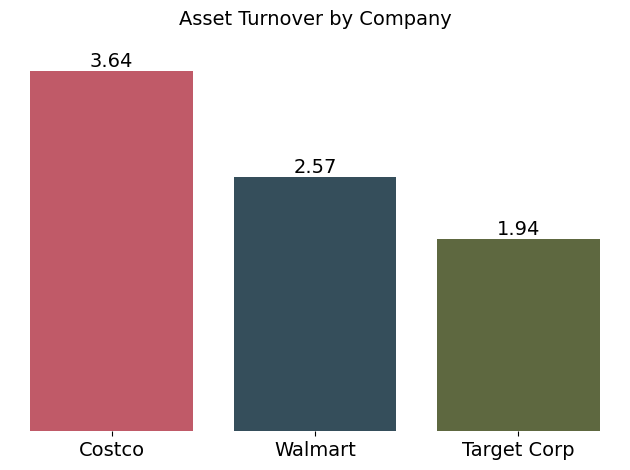

In [233]:
df["Asset Turnover"] = df["income_Total Revenue"] / df["balance_Total Assets"]

order = df.sort_values("Asset Turnover", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="Asset Turnover",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=14,
    )

ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("Asset Turnover by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Higher asset turnover means the company uses its assets more efficiently to generate sales. In retail, values above 2 are generally strong.

Costco – 3.64, excellent asset utilization

Walmart – 2.57, solid efficiency

Target – 1.94, slightly below average

## Solvency


### Debt to Equity Ratio
Debt to equity ratio is computed by dividing total liabilities by shareholders' equity. It reflects the company's capital structure and financial leverage.

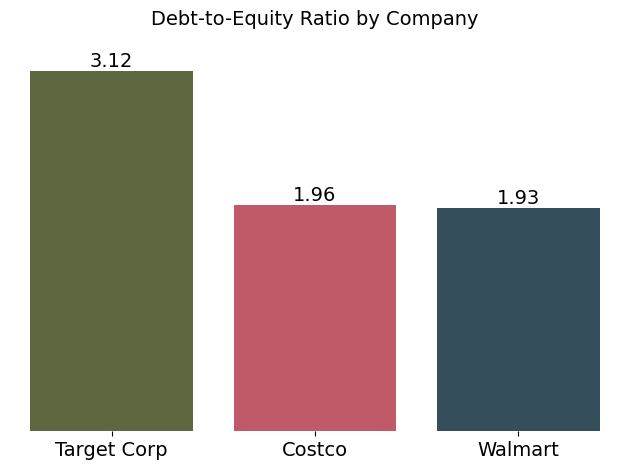

In [234]:
df["Debt-to-Equity"] = df["balance_Total Liabilities Net Minority Interest"] / df["balance_Stockholders Equity"]

order = df.sort_values("Debt-to-Equity", ascending=False)["Company"]

ax = sns.barplot(
    data=df,
    x="Company",
    y="Debt-to-Equity",
    order=order,
    legend=False,
    hue="Company",
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=14,
    )

ax.set_xlabel("")
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True, top=True, right=True)
ax.tick_params(axis="x", labelsize=14)
plt.title("Debt-to-Equity Ratio by Company", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



A lower debt-to-equity ratio indicates less reliance on borrowed money, which usually means lower financial risk. In retail, ratios under 2 are generally considered healthy, while values above 3 suggest higher leverage.

Target – 3.12, relatively high leverage

Costco – 1.96, balanced debt level

Walmart – 1.93, similarly balanced

## Financial rating

In [236]:
metrics = ['ROI', 'Gross_Margin', 'ROS', 'Current Ratio', 'Quick Ratio', 'Asset Turnover', 'Debt-to-Equity']
ranges = {
    'ROI': (0.05, 0.2),
    'Gross_Margin': (0.05, 0.3),
    'ROS': (0.01, 0.06),
    'Current Ratio': (0.5, 1.5),
    'Quick Ratio': (0.2, 0.7),
    'Asset Turnover': (1, 4),
    'Debt-to-Equity': (0.5, 2.5)
}
invert = {'Debt-to-Equity'}

def normalize(x, a, b, inv=False):
    n = max(0, min(1, (x - a) / (b - a)))
    return (1 - n if inv else n) * 100

df_norm = df[['Company']].copy()
for m in metrics:
    a, b = ranges[m]
    df_norm[m] = df[m].apply(lambda x: normalize(x, a, b, m in invert))

cats = metrics + [metrics[0]]
for c in ['Walmart', 'Costco', 'Target Corp']:
    r = df_norm[df_norm['Company'] == c]
    v = r[metrics].values.flatten().tolist()
    v += v[:1]
    raw = df[df['Company'] == c][metrics].values.flatten().tolist()
    raw += raw[:1]
    cd = list(zip(cats, raw))
    fig = go.Figure(go.Scatterpolar(
        r=v,
        theta=cats,
        fill='toself'
    ))
    fig.update_layout(
        polar=dict(radialaxis=dict(range=[0, 100], visible=False)),
        title=c
    )
    fig.show()